## Function: Photo-current vs dark current of IR Detectors 

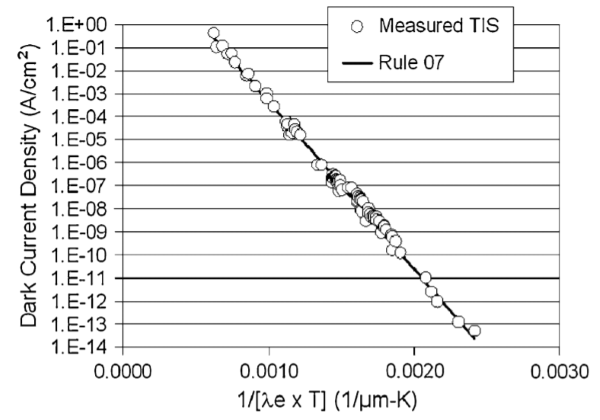

In [1]:
# Evaluate photo-current vs dark current of IR Detectors based on incoming photon flux, QE and Rule-07 dark current. 
#Version 20 18-Oct-2022
#%matplotlib widget
#%matplotlib inline
import numpy as np
import math
import scipy.special as sp
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from ipywidgets import *


# Constants
q = 1.602e-19 # [C], Elementary charge
kB = 1.38e-23 # [J/K], Boltzmann's constant

# Empirical parameters from Rule 07-Revisited: Journal of ELECTRONIC MATERIALS, Vol. 39, No. 7, 2010

J0 = 8367.00001853855 # [A/cm2]
Pwr = 0.544071281108481
C = -1.16239134096245
WLscale = 0.200847413564122 #[um] 
WLthreshold = 4.63513642316149 # [um]

#from IPython.display import Image
#display(Image('Rule07-revisited.png',width = 300, height = 200))

#import matplotlib.image as mpimg
#img = mpimg.imread('Rule07.png')
#imgplot = plt.imshow(img)
#plt.axis('off') 

Rule07Title=widgets.HTML(value = "<br><p style='font-size:16pt'><b> Rule 07 </b></p>"
                         "<b><i> Rule 07 </b></i>" " (Journal of ELECTRONIC MATERIALS, Vol. 39, No. 7, 2010) is the best empirical prediction of IR detectors' dark current."
                         " It works very well for the HgCdTe detector technology."
                         " The dark current of other detector technologies (InSb, InAsSb, superlattices) will have an adjustment factor (tunable in this calculator) from the Rule 07.</b></p>"
                         "e.g. adjustment factor of Type II superlattice can be smaller or greater than 1, depending on SRH-lifetime (Journal of ELECTRONIC MATERIALS, Vol. 38, No. 8, 2009).<br>"   
                        )

display(Rule07Title)

# Calculation parameters
Temp = np.linspace(1,300,2991) # [K], Temperature
Temp1 = np.ones(Temp.shape) # Ones vector of size(Temp)

## "Set Parameters" section heading
SetParamHdg = widgets.HTML(value = "<p style='font-size:16pt'><b>Set Parameters</b></p>")
display(SetParamHdg)


def plot_func(WL1, WL2, Flux, pitch, ScaleFactor, QE, OperT):
   
    # Oper is the target operating temperature
    # WL1 is band cut-on wavelength
    # WL2 is band cut-off wavelength, assuming the detector's cut-off wavelength is the same as the band cut-off
    # Flux is the integrated photon flux coming to the detector in the WL1 - WL2 wave band [ph/s]
    
    skip = False # skip plot if inputs are not in bounds
    if WL2 < WLthreshold :
        WL2 = WLthreshold + 0.1
        print ("Wavelenght 2 needs to be >= 4.6um")
        skip = True
    elif WL1 <= 0:
        skip = True
    elif WL2 <= 0:
        skip = True
    elif Flux <=0:
        skip = True
    elif pitch <=0:
        skip = True
 
    if skip == True:
        print ('invalid inputs')
    else:
        # Calculating Photo Current and Photo Current Density
        Isig=Flux*QE*q*Temp1
        Jsig=Isig/(pitch*1e-4)**2

        # Calculating Dark Current and Dark Current Density

        if WL2>=WLthreshold:
            WLe=WL2
        else:
            WLe=WL2/(1-(WLscale/WL2-WLscale/WLthreshold)^Pwr)

        Jdark=ScaleFactor*J0*np.exp(C*1.24*q/(kB*WLe*Temp))
        Idark=Jdark*(pitch*1e-4)**2

        JdarkOper=ScaleFactor*J0*np.exp(C*1.24*q/(kB*WLe*OperT))
        IdarkOper=JdarkOper*(pitch*1e-4)**2

        TBLIP=C*1.24*q/(kB*WLe*np.log(Jsig/(J0*ScaleFactor)))
        MaxBLIP=C*1.24*q/(kB*WLe*np.log(Jsig/(J0*ScaleFactor)/(QE)))

        JdarkOperd =  "{:.4e}".format(JdarkOper)
        IdarkOperd =  "{:.4e}".format(IdarkOper)
        Jsigd = "{:.4e}".format(Jsig[0])
        Isigd = "{:.4e}".format(Isig[0])

             ## "Calculated Results" section heading and text results
        CalcResults = widgets.HTML(value = "<br><p style='font-size:16pt'><b>Calculated Results:</b></p>"
            "<b>Photo Current Density: </b>" + str(Jsigd) + " A/cm^2    <b>              Photo Current: </b>" + str(Isigd) + " A<br>  "

            "<b>Dark Current Density at </b>" +str(OperT)+"K <b> is </b>" + str(JdarkOperd) + " A/cm^2 <b>  Dark Current at </b>" +str(OperT)+"K <b> is </b>" + str(IdarkOperd) + " A<br>"

            "<b>Detector BLIP Temperature: </b>" + str(round(TBLIP[0],2)) + " K  <b>                  Max BLIP Temperature: </b>" + str(round(MaxBLIP[0],2)) + " K<br> "
            )
        display(CalcResults) 

        #ok
        # Plotting
        plt.style.use('classic')
        fig=plt.figure(figsize=(14,7));
        gs = gridspec.GridSpec(1, 2,width_ratios=[1.5,1])
        ax1=plt.subplot(gs[1])
        plt.grid(True)
        ax1.plot ( 1000/Temp, Jdark,':r', linewidth=4, label='Dark Current')
        ax1.plot ( 1000/Temp, Jdark,'r')
        ax1.plot ( 1000/Temp, Jsig, 'b', label='Photo Current')
        plt.yscale('log')
        plt.axis([1000/max(Temp),1000/50,1e-14,1])
        plt.xlabel('1000/Temperature [1/K]')
        plt.ylabel('Current Density [A/cm2]')
        plt.text(1000/OperT, JdarkOper, "<" ,color='grey',fontsize=16)
        plt.legend()
    
        plt.style.use('dark_background')
        ax2=plt.subplot(gs[0])
        ax2.plot ( Temp, Jdark,':', color='red',linewidth=5)
        ax2.plot ( Temp, Jdark,'r',linewidth=3,label='Dark Current')
        ax2.plot ( Temp, Jdark*100,color='orange',linewidth=1,alpha=0.75)
        ax2.plot ( Temp, Jdark*10000,color='yellow',linewidth=1,alpha=0.75)
        ax2.plot ( Temp, Jdark*1000000,color='green',linewidth=1,alpha=0.75)
        ax2.plot ( Temp, Jdark*100000000,color='steelblue',linewidth=1,alpha=0.75)
        ax2.plot ( Temp, Jsig, color='royalblue', linewidth=2.5, label='Photo Current')
        plt.text(260, 1.4*Jsig[0], "Photo" ,color='royalblue',fontsize=14)
    
        #cross hair lines  .
        vlinex = np.repeat(OperT,3)
        vliney = [1e-16, 1e-8, 1e-0 ]
        hlinex = [25, 250, 400]
        hliney = np.repeat(JdarkOper,3)
        plt.plot (vlinex,vliney,'--',color='grey',linewidth=2) 
        #plt.text(OperT+3, 2e-15, "OperTemp= " + str(OperT),color='magenta',fontsize=15)

        if JdarkOper > Jsig[0]: 
            plt.text(260, 1.4*JdarkOper, "Dark!" ,color='red',fontsize=15)
            plt.plot (hlinex,hliney,'--',color='red',linewidth=2)
        else:
            plt.plot (hlinex,hliney,'--',color='grey',linewidth=2)
            plt.text(260, 1.4*JdarkOper, "Dark" ,color='grey',fontsize=12)

        if OperT < 250:
            plt.text(OperT+5, 2e-14, "Temp= " + str(round(OperT)),color='grey',fontsize=12)
        else:
            plt.text(255, 2e-14, "Temp = " + str(round(OperT)),color='grey',fontsize=12)
        plt.yscale('log')
        plt.axis([50,max(Temp),1e-14,1]) 
    
        # Major ticks every 20, minor ticks every 5
        major_xticks = np.arange(50, max(Temp), 50)
        minor_xticks = np.arange(50, max(Temp), 10)
        ax2.set_xticks(major_xticks)
        ax2.set_xticks(minor_xticks, minor=True)

        # And a corresponding grid
        ax2.grid(which='minor', alpha=0.40)
        ax2.grid(which='major', alpha=0.80)

        plt.xlabel('Detector Temperature [K]')
        plt.ylabel('Current Density [A/cm2]')
        plt.legend()   
    
    
style = {'description_width': 'initial'} 

# Main interact() call
interact(plot_func,
    WL1 = widgets.FloatText(value=2,step=0.25, description=r'Band cut-on $\lambda_{\rm 1}$ (um)', style=style), # [um], Cut-on Wavelength um
    WL2 = widgets.FloatText(value=6,step=0.25, description=r'Band cut-off $\lambda_{\rm 2}$ (um)', style=style), # [um], Cut-off Wavelength um
    Flux = widgets.FloatText(value=1.7e9, step=1000, description=r'Photon Flux (photon/sec)', style=style), # [photon/s], Photon Flux on Detector
    pitch = widgets.FloatText(value=20, min=1, max=40, step=1, description='Pixel Pitch (um)', style=style), # [%], Pitch
    ScaleFactor = widgets.FloatText(value=1, min=-2, max=2, step=0.1, description='Dark Current Scale Factor (unitless):', style=style,continuous_update=False), # Ratio between dark current and Rule 07
    QE = widgets.FloatText(value=0.80, min=0.1, max=100, step=0.1, description='Quantum Efficiency (unitless)',style=style,continuous_update=False), # [%], Quantum Efficiency
    OperT =  FloatSlider(value=120, min=50, max=300, step=1, description='Operating Temp (K)', layout=Layout(width='600px'), style=style,continuous_update=False)
    )

HTML(value="<br><p style='font-size:16pt'><b> Rule 07 </b></p><b><i> Rule 07 </b></i> (Journal of ELECTRONIC M…

HTML(value="<p style='font-size:16pt'><b>Set Parameters</b></p>")

interactive(children=(FloatText(value=2.0, description='Band cut-on $\\lambda_{\\rm 1}$ (um)', step=0.25, styl…

<function __main__.plot_func(WL1, WL2, Flux, pitch, ScaleFactor, QE, OperT)>

Code by: Minh Nguyen HRL, "Rule'07" Algorithm by Bill Tennant et al 